In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout


# Reading the dataset


In [109]:
bank_df = pd.read_csv("Churn_Modelling.csv")

In [110]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [112]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [113]:
bank_df.shape

(10000, 14)

In [114]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

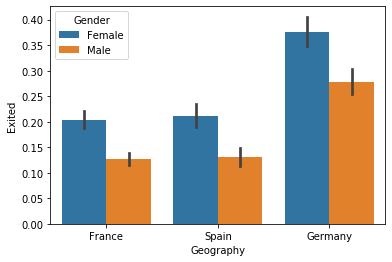

In [115]:
sns.barplot(x='Geography',y='Exited', hue='Gender',data=bank_df)

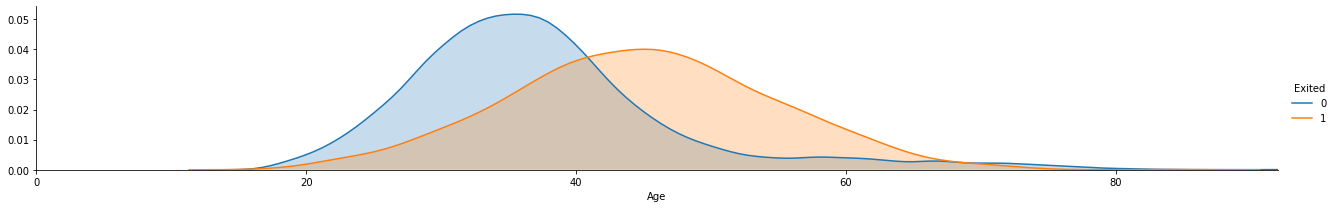

In [116]:
a=sns.FacetGrid(bank_df,hue='Exited',aspect=6)
a.map(sns.kdeplot,'Age',shade=True)
a.set(xlim=[0,bank_df['Age'].max()])
a.add_legend()

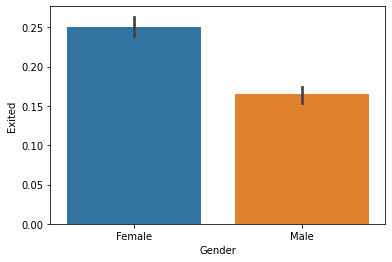

In [20]:
sns.barplot(x = 'Gender',y='Exited',data=bank_df)


# Dropping the columns which are unique for all users like IDs


In [118]:
bank_n_df = bank_df.drop(["RowNumber" , "CustomerId" , "Surname" ], axis = 1)

In [119]:
bank_n_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Distinguish the feature and target set

In [120]:
X = bank_n_df.drop('Exited',axis = 1)
y = bank_n_df[['Exited']]

In [121]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [122]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Data Preprocessing

In [123]:
#Treating the Catagorical Columns i.e Geography, Gender

In [124]:
bank_dum_df = pd.get_dummies(X,columns=['Geography', 'Gender'])

In [125]:
bank_dum_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [126]:
#Normalising the data

In [127]:
from scipy.stats import zscore

In [128]:
bank_z_df = bank_dum_df.apply(zscore)

In [129]:
bank_z_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988


In [130]:
X = bank_z_df

#  Dividing the data set into Train and test sets


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [133]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (7000, 13), (7000, 1)
testing shapes: (3000, 13), (3000, 1)


 # Initializing & building the model


In [134]:
model = Sequential()


In [135]:
model.add(Dense(activation = 'relu', input_dim = 13 , units=6, kernel_initializer='uniform'))
model.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 
model.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 



In [136]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [137]:
#Compiling the Neural Network

In [138]:
from tensorflow.keras import optimizers



In [139]:
sgd = optimizers.SGD(lr=0.03)
#Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
#Executing the Model

In [141]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Train on 6300 samples, validate on 700 samples
Epoch 1/200
6300/6300 - 0s - loss: 0.5683 - accuracy: 0.7992 - val_loss: 0.5352 - val_accuracy: 0.7800
Epoch 2/200
6300/6300 - 0s - loss: 0.5061 - accuracy: 0.8006 - val_loss: 0.5269 - val_accuracy: 0.7800
Epoch 3/200
6300/6300 - 0s - loss: 0.5003 - accuracy: 0.8006 - val_loss: 0.5272 - val_accuracy: 0.7800
Epoch 4/200
6300/6300 - 0s - loss: 0.4996 - accuracy: 0.8006 - val_loss: 0.5278 - val_accuracy: 0.7800
Epoch 5/200
6300/6300 - 0s - loss: 0.4995 - accuracy: 0.8006 - val_loss: 0.5280 - val_accuracy: 0.7800
Epoch 6/200
6300/6300 - 0s - loss: 0.4994 - accuracy: 0.8006 - val_loss: 0.5280 - val_accuracy: 0.7800
Epoch 7/200
6300/6300 - 0s - loss: 0.4993 - accuracy: 0.8006 - val_loss: 0.5279 - val_accuracy: 0.7800
Epoch 8/200
6300/6300 - 0s - loss: 0.4993 - accuracy: 0.8006 - val_loss: 0.5281 - val_accuracy: 0.7800
Epoch 9/200
6300/6300 - 0s - loss: 0.4992 - accuracy: 0.8006 - val_loss: 0.5278 - val_accuracy: 0.7800
Epoch 10/200
6300/6300 - 0

Epoch 78/200
6300/6300 - 0s - loss: 0.3368 - accuracy: 0.8617 - val_loss: 0.3519 - val_accuracy: 0.8514
Epoch 79/200
6300/6300 - 0s - loss: 0.3377 - accuracy: 0.8611 - val_loss: 0.3511 - val_accuracy: 0.8400
Epoch 80/200
6300/6300 - 0s - loss: 0.3376 - accuracy: 0.8627 - val_loss: 0.3532 - val_accuracy: 0.8429
Epoch 81/200
6300/6300 - 0s - loss: 0.3365 - accuracy: 0.8611 - val_loss: 0.3492 - val_accuracy: 0.8486
Epoch 82/200
6300/6300 - 0s - loss: 0.3375 - accuracy: 0.8614 - val_loss: 0.3555 - val_accuracy: 0.8400
Epoch 83/200
6300/6300 - 0s - loss: 0.3364 - accuracy: 0.8635 - val_loss: 0.3523 - val_accuracy: 0.8386
Epoch 84/200
6300/6300 - 0s - loss: 0.3363 - accuracy: 0.8627 - val_loss: 0.3519 - val_accuracy: 0.8443
Epoch 85/200
6300/6300 - 0s - loss: 0.3369 - accuracy: 0.8614 - val_loss: 0.3590 - val_accuracy: 0.8414
Epoch 86/200
6300/6300 - 0s - loss: 0.3364 - accuracy: 0.8616 - val_loss: 0.3598 - val_accuracy: 0.8429
Epoch 87/200
6300/6300 - 0s - loss: 0.3361 - accuracy: 0.8632 - 

Epoch 157/200
6300/6300 - 0s - loss: 0.3355 - accuracy: 0.8611 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 158/200
6300/6300 - 0s - loss: 0.3345 - accuracy: 0.8621 - val_loss: 0.3576 - val_accuracy: 0.8414
Epoch 159/200
6300/6300 - 0s - loss: 0.3348 - accuracy: 0.8611 - val_loss: 0.3520 - val_accuracy: 0.8543
Epoch 160/200
6300/6300 - 0s - loss: 0.3351 - accuracy: 0.8606 - val_loss: 0.3503 - val_accuracy: 0.8514
Epoch 161/200
6300/6300 - 0s - loss: 0.3343 - accuracy: 0.8613 - val_loss: 0.3543 - val_accuracy: 0.8457
Epoch 162/200
6300/6300 - 0s - loss: 0.3343 - accuracy: 0.8619 - val_loss: 0.3721 - val_accuracy: 0.8371
Epoch 163/200
6300/6300 - 0s - loss: 0.3351 - accuracy: 0.8600 - val_loss: 0.3536 - val_accuracy: 0.8414
Epoch 164/200
6300/6300 - 0s - loss: 0.3340 - accuracy: 0.8595 - val_loss: 0.3546 - val_accuracy: 0.8500
Epoch 165/200
6300/6300 - 0s - loss: 0.3350 - accuracy: 0.8606 - val_loss: 0.3498 - val_accuracy: 0.8571
Epoch 166/200
6300/6300 - 0s - loss: 0.3352 - accuracy:

# Predicting the Test set results¶


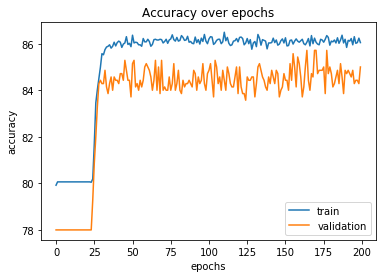

In [142]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [143]:
y_pred = model.predict(X_test)
y_pred

array([[0.03801921],
       [0.13127756],
       [0.05975845],
       ...,
       [0.09621888],
       [0.14292094],
       [0.12424681]], dtype=float32)

In [144]:
y_pred[[y_pred > 0.5]].shape

C:\Users\Bala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


(378,)

# Predicting the score with threshold 0.5

In [145]:
y_pred = (y_pred > 0.5).astype(int)

In [146]:
y_pred[[y_pred > 0.5]].shape

C:\Users\Bala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


(378,)

In [147]:
probabs = model.predict_proba(X_test)

In [148]:
probabs

array([[0.03801921],
       [0.13127756],
       [0.05975845],
       ...,
       [0.09621888],
       [0.14292094],
       [0.12424681]], dtype=float32)

# Making the Confusion Matrix


In [149]:
from sklearn.metrics import confusion_matrix,fbeta_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[2292   81]
 [ 330  297]]


In [150]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')


86.3 % of testing data was classified correctly


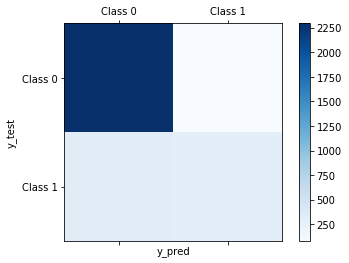

In [151]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()